In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd

## bands information

https://gisgeography.com/sentinel-2-bands-combinations/

similar gradient appearing in all bands

=> some normalization help like ndvi


In [2]:
# fp = r'../raw_data/rice_1y/id_6094bb4df85c5e001b870910_all_bands_2021-01-05.tif'
# img = rasterio.open(fp)
# for i in range(1,13):
#     plt.title(f"band {i}")
#     show(img.read(i))
    
# print(img.width)
# print(img.height)

## NDVI

In [3]:
# # compute ndvi
# ndvi = (img.read(8)-img.read(4))/(img.read(8) + img.read(4))

# show(ndvi)

In [4]:
# ndvi.shape

In [5]:
# np.median(ndvi)

In [6]:
# ndvi_ = np.nan_to_num(ndvi, nan=-1)
# ndvi_values =np.array([x for x in ndvi_.flatten() if x != -1])
# ndvi_values.mean(),ndvi_values.var()

In [7]:
# ndvi_.flatten()

## moisture index

In [8]:
# # moisture index
# mi = (img.read(8)-img.read(11))/(img.read(8) + img.read(11))

# show(mi)

In [9]:
# mi

## Visualize Data Rice Fields

In [10]:
# fp = r'../raw_data/rice_1y/id_6094bb4df85c5e001b870910_all_bands_2021-01-05.tif'
# img = rasterio.open(fp)
# for i in range(1,13):
#     plt.title(f"band {i}")
#     show(img.read(i))
    
# print(img.width)
# print(img.height)


In [11]:
# img.count

In [12]:
# img.read(8)

In [13]:
# array = img.read()
# stats = []
# for band in array:
#     stats.append({
#           'min': band.min(),
#            'mean': band.mean(),
#            'median': np.median(band),
#          'max': band.max()})

In [14]:
# stats

In [15]:
# import matplotlib.pyplot as plt
# plt.hist(img.read().flatten(), alpha = 1)

In [16]:
# from rasterio.plot import show_hist
# show_hist(img, bins=50, lw=0.0, stacked=False, alpha=0.3,
#      histtype='stepfilled', title="Histogram")

In [17]:
# band4= img.read(4)

In [18]:
# band4.shape

## SugarCane Visualization

In [19]:
# fp = r'../raw_data/sugarcane/id_6054a1b558a7cd00480009c8_all_bands_2020-07-03.tif'
# sugar_cane = rasterio.open(fp)
# for i in range(1,13):
#     plt.title(f"band {i}")
#     show(sugar_cane.read(i))
    
# print(sugar_cane.width)
# print(sugar_cane.height)

In [20]:
# sugar_cane.count

In [21]:
# array = sugar_cane.read()
# stats = []
# for band in array:
#     stats.append({
#           'min': band.min(),
#            'mean': band.mean(),
#            'median': np.median(band),
#          'max': band.max()})
# stats

In [22]:
# sugar_cane.read(8).flatten()

In [23]:
# import matplotlib.pyplot as plt
# plt.hist(sugar_cane.read().flatten(), alpha = 1)

In [24]:
# from rasterio.plot import show_hist
# show_hist(sugar_cane, bins=50, lw=0.0, stacked=False, alpha=0.3,
#      histtype='stepfilled', title="Histogram")

## Create a Dataset

In [67]:
def create_dataset(folders, n = None): 
    X = []
    y = []
    
    for folder in folders:
        files_s = glob.glob(f"../raw_data/{folder}/*all*.tif")
        if n is None:
            n = len(files_s)
        for file in files_s[:n]:
            filename = os.path.basename(f"../raw_data/{folder}/{file}")
            file_id, date = filename.split('_all_bands_')
            date = date.replace('.tif','')
    
            img = rasterio.open(file)
            b_dict = {'date':date,'file_id':file_id,'target': folder}
            
            for band in range(1,13):
                b_dict[f'b{band}'] = img.read(band).flatten()
            X.append(b_dict)      
            img.close()
    df = pd.DataFrame(X) 
#     ndvi = (img.read(df.b8)-img.read(df.b4))/(img.read(df.b8) + img.read(df.b4))
#     df[ndvi_mean] = ndvi.mean()
    return df

folders = ['rice_1y', 'sugarcane']
df = create_dataset(folders, n = 5)
df

,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2612, 2646, 2764, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2842, 3167, 3167, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4668, 4606, 4606, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2280, 2162, 2128, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2800, 2774, 2774, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2346, 3120, 3120, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ..."
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1246, 1208, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1270, 1270, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1064, 1064, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58..."
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5384, 5356, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4304, 4211, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 15941, 15941, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,2021-06-28,id_6054a1b458a7cd004800098f,sugarcane,"[2372, 2372, 2372, 0, 0, 0, 0, 0, 0, 0, 0, 237...","[2358, 2348, 2202, 0, 0, 0, 0, 0, 0, 0, 0, 236...","[2430, 2344, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 243...","[2180, 2200, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 218...","[2729, 2729, 2728, 0, 0, 0, 0, 0, 0, 0, 0, 270...","[3540, 3540, 3547, 0, 0, 0, 0, 0, 0, 0, 0, 358...","[3912, 3912, 3862, 0, 0, 0, 0, 0, 0, 0, 0, 394...","[3838, 3816, 3728, 0, 0, 0, 0, 0, 0, 0, 0, 389...","[4084, 4084, 4045, 0, 0, 0, 0, 0, 0, 0, 0, 412...","[8700, 8700, 8700, 0, 0, 0, 0, 0, 0, 0, 0, 870...","[29

## Feature Engineering

### NDVI Compute

In [27]:
def computeNdvi_mean(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)

    ndvi = (row.b8-row.b4)/(row.b8 + row.b4)

    ndvi_ = np.nan_to_num(ndvi, nan=-1)
    ndvi_values =np.array([x for x in ndvi_ if x != -1])
    ndvi_mean = ndvi_values.mean()
    return ndvi_mean

df['ndvi_mean']= pd.DataFrame(df.apply(lambda row : computeNdvi_mean(row), axis = 1))
df

In [28]:
df['ndvi_mean']= pd.DataFrame(df.apply(lambda row : computeNdvi_mean(row), axis = 1))
df

<ipython-input-27-dada7b1cc39e>:5: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (row.b8-row.b4)/(row.b8 + row.b4)


,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,ndvi_mean
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2612, 2646, 2764, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2842, 3167, 3167, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4668, 4606, 4606, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479770
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.024270
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2280, 2162, 2128, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2800, 2774, 2774, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2346, 3120, 3120, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ...",0.515295
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1246, 1208, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1270, 1270, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1064, 1064, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58...",0.163137
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5384, 5356, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4304, 4211, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 15941, 15941, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042841
5,2021-06-28,id_6054a1b458a7cd004800098f,sugarcane,"[2372, 2372, 2372, 0, 0, 0, 0, 0, 0, 0, 0, 237...","[2358, 2348, 2202, 0, 0, 0, 0, 0, 0, 0, 0, 236...","[2430, 2344, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 243...","[2180, 2200, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 218...","[2729, 2729, 2728, 0, 0, 0, 0, 0, 0, 0, 0, 270...","[3540, 3540, 3547, 0, 0, 0, 0, 0, 0, 0, 0, 358...","[3912, 3912, 3862, 0, 0, 0, 0, 0, 0, 0, 0, 394...","[3838, 3816, 3728, 0, 0, 0, 0, 0, 0, 0, 0, 389...","[4084, 4084, 4045, 0, 0, 0, 0, 0, 0, 0, 0, 412...","

In [29]:
def computeNdvi_median(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)

    ndvi = (row.b8-row.b4)/(row.b8 + row.b4)

    ndvi_ = np.nan_to_num(ndvi, nan=-1)
    ndvi_values =np.array([x for x in ndvi_ if x != -1])
    ndvi_median = np.median(ndvi_values)
    
    return ndvi_median

In [30]:
df['ndvi_median']= pd.DataFrame(df.apply(lambda row : computeNdvi_median(row), axis = 1))
df

<ipython-input-29-39abd703965e>:5: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (row.b8-row.b4)/(row.b8 + row.b4)


,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,ndvi_mean,ndvi_median
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2612, 2646, 2764, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2842, 3167, 3167, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4668, 4606, 4606, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479770,0.496448
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.024270,0.023761
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2280, 2162, 2128, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2800, 2774, 2774, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2346, 3120, 3120, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ...",0.515295,0.505023
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1246, 1208, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1270, 1270, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1064, 1064, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58...",0.163137,0.158295
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5384, 5356, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4304, 4211, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 15941, 15941, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042841,0.042198
5,2021-06-28,id_6054a1b458a7cd004800098f,sugarcane,"[2372, 2372, 2372, 0, 0, 0, 0, 0, 0, 0, 0, 237...","[2358, 2348, 2202, 0, 0, 0, 0, 0, 0, 0, 0, 236...","[2430, 2344, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 243...","[2180, 2200, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 218...","[2729, 2729, 2728, 0, 0, 0, 0, 0, 0, 0, 0, 270...","[3540, 3540, 3547, 0, 0, 0, 0, 0, 0, 0, 0, 358...","[3912, 3912, 3862, 0, 0, 0, 0, 0, 0, 0, 0, 394...","[3838, 3816, 3728, 0, 0, 0, 0, 0, 0, 0, 0, 389.

In [31]:
def computeNdvi_std(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)

    ndvi = (row.b8-row.b4)/(row.b8 + row.b4)

    ndvi_ = np.nan_to_num(ndvi, nan=-1)
    ndvi_values =np.array([x for x in ndvi_ if x != -1])
    ndvi_std = np.std(ndvi_values)
    
    return ndvi_std

In [32]:
df['ndvi_std']= pd.DataFrame(df.apply(lambda row : computeNdvi_std(row), axis = 1))
df

<ipython-input-31-c575dfd3ce0f>:5: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (row.b8-row.b4)/(row.b8 + row.b4)


,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,ndvi_mean,ndvi_median,ndvi_std
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2612, 2646, 2764, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2842, 3167, 3167, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4668, 4606, 4606, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479770,0.496448,0.059450
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.024270,0.023761,0.004722
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2280, 2162, 2128, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2800, 2774, 2774, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2346, 3120, 3120, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ...",0.515295,0.505023,0.039212
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1246, 1208, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1270, 1270, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1064, 1064, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58...",0.163137,0.158295,0.058246
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5384, 5356, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4304, 4211, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 15941, 15941, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042841,0.042198,0.011207
5,2021-06-28,id_6054a1b458a7cd004800098f,sugarcane,"[2372, 2372, 2372, 0, 0, 0, 0, 0, 0, 0, 0, 237...","[2358, 2348, 2202, 0, 0, 0, 0, 0, 0, 0, 0, 236...","[2430, 2344, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 243...","[2180, 2200, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 218...","[2729, 2729, 2728, 0, 0, 0, 0, 0, 0, 0, 0, 270...","[3540, 3540, 3547, 0, 0, 0, 0, 0, 0, 0, 0, 358...","[3912, 3912, 3862, 0, 0, 0, 0, 0, 0, 0, 0, 39

### Moisture Compute 

In [33]:
def computeMi(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    
    mi = (row.b8-row.b11)/(row.b8 + row.b11)
    mi_ = np.nan_to_num(mi, nan=-1)
    mi_values =np.array([x for x in mi_.flatten() if x != -1])
    mi_mean = mi_values.mean()
    return mi_mean

In [34]:
df['mi_mean']= pd.DataFrame(df.apply(lambda row : computeMi(row), axis = 1))
df

<ipython-input-33-369db7a88a25>:5: RuntimeWarning: invalid value encountered in true_divide
  mi = (row.b8-row.b11)/(row.b8 + row.b11)


,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,ndvi_mean,ndvi_median,ndvi_std,mi_mean
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2612, 2646, 2764, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2842, 3167, 3167, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4668, 4606, 4606, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479770,0.496448,0.059450,0.893525
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.024270,0.023761,0.004722,0.324392
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2280, 2162, 2128, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2800, 2774, 2774, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2346, 3120, 3120, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ...",0.515295,0.505023,0.039212,0.278630
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1246, 1208, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1270, 1270, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1064, 1064, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58...",0.163137,0.158295,0.058246,0.330438
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5384, 5356, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4304, 4211, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 15941, 15941, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042841,0.042198,0.011207,0.457259
5,2021-06-28,id_6054a1b458a7cd004800098f,sugarcane,"[2372, 2372, 2372, 0, 0, 0, 0, 0, 0, 0, 0, 237...","[2358, 2348, 2202, 0, 0, 0, 0, 0, 0, 0, 0, 236...","[2430, 2344, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 243...","[2180, 2200, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 218...","[2729, 2729, 2728, 0, 0, 0, 0, 0, 0, 0, 0, 270...","[3540, 3540, 3547, 0, 0, 0, 0, 0, 0, 0, 0, 3

In [35]:
def computeMi_median(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    
    mi = (row.b8-row.b11)/(row.b8 + row.b11)
    mi_ = np.nan_to_num(mi, nan=-1)
    mi_values =np.array([x for x in mi_.flatten() if x != -1])
    mi_median = np.median(mi_values)
    return mi_median
df['mi_median']= pd.DataFrame(df.apply(lambda row : computeMi_median(row), axis = 1))
df

<ipython-input-35-ce2f3b5c50b2>:5: RuntimeWarning: invalid value encountered in true_divide
  mi = (row.b8-row.b11)/(row.b8 + row.b11)


,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2612, 2646, 2764, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2842, 3167, 3167, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4668, 4606, 4606, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479770,0.496448,0.059450,0.893525,0.160805
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.024270,0.023761,0.004722,0.324392,0.324265
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2280, 2162, 2128, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2800, 2774, 2774, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2346, 3120, 3120, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ...",0.515295,0.505023,0.039212,0.278630,0.272507
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1246, 1208, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1270, 1270, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1064, 1064, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58...",0.163137,0.158295,0.058246,0.330438,0.378871
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5384, 5356, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4304, 4211, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 15941, 15941, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042841,0.042198,0.011207,0.457259,0.458932
5,2021-06-28,id_6054a1b458a7cd004800098f,sugarcane,"[2372, 2372, 2372, 0, 0, 0, 0, 0, 0, 0, 0, 237...","[2358, 2348, 2202, 0, 0, 0, 0, 0, 0, 0, 0, 236...","[2430, 2344, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 243...","[2180, 2200, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 218...","[2729, 2729, 2728, 0, 0, 0, 0, 0, 0, 0, 0

In [36]:
def computeMi_std(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    
    mi = (row.b8-row.b11)/(row.b8 + row.b11)
    mi_ = np.nan_to_num(mi, nan=-1)
    mi_values =np.array([x for x in mi_.flatten() if x != -1])
    mi_median = np.median(mi_values)
    return mi_median
df['mi_std']= pd.DataFrame(df.apply(lambda row : computeMi_std(row), axis = 1))
df

<ipython-input-36-4234a4c35070>:5: RuntimeWarning: invalid value encountered in true_divide
  mi = (row.b8-row.b11)/(row.b8 + row.b11)


,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,...,b9,b10,b11,b12,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[2842, 3167, 3167, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4668, 4606, 4606, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479770,0.496448,0.059450,0.893525,0.160805,0.160805
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.024270,0.023761,0.004722,0.324392,0.324265,0.324265
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 2800, 2774, 2774, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2346, 3120, 3120, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ...",0.515295,0.505023,0.039212,0.278630,0.272507,0.272507
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1270, 1270, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1064, 1064, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58...",0.163137,0.158295,0.058246,0.330438,0.378871,0.378871
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 4304, 4211, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 15941, 15941, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042841,0.042198,0.011207,0.457259,0.458932,0.458932
5,2021-06-28,id_6054a1b458a7cd004800098f,sugarcane,"[2372, 2372, 2372, 0, 0, 0, 0, 0, 0, 0, 0, 237...","[2358, 2348, 2202, 0, 0, 0, 0, 0, 0, 0, 0, 236...","[2430, 2344, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 243...","[2180, 2200, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 218...","[2729, 2729, 2728, 0, 0, 0, 0, 0, 0, 0, 0, 270...","[3540, 3540, 3547, 0, 0, 0, 0, 0, 0, 0, 0, 358...","[3912, 3912, 3862, 0, 0, 0, 0, 0, 0, 0, 0, 394...",...,"[4084, 4084, 4045, 0, 0, 0, 0, 0, 0, 0, 0, 412...","[8700, 8700, 870

### Combo 1 (B7 + B6 + B4)

In [37]:
def computeCombo1(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    
    band_combo_1 = row.b7 + row.b6 + row.b4

    bc1_ = np.nan_to_num(band_combo_1, nan=-1)
    bc1_values =np.array([x for x in bc1_.flatten() if x != -1])
    bc1_mean = bc1_values.mean()
    
    return bc1_mean

df['Cb1_mean']= pd.DataFrame(df.apply(lambda row : computeCombo1(row), axis = 1))
df

,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,...,b10,b11,b12,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,Cb1_mean
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[4668, 4606, 4606, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479770,0.496448,0.059450,0.893525,0.160805,0.160805,2491.084034
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.024270,0.023761,0.004722,0.324392,0.324265,0.324265,4878.819959
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 2346, 3120, 3120, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ...",0.515295,0.505023,0.039212,0.278630,0.272507,0.272507,2694.798611
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1064, 1064, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58...",0.163137,0.158295,0.058246,0.330438,0.378871,0.378871,1540.683946
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 15941, 15941, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042841,0.042198,0.011207,0.457259,0.458932,0.458932,6763.432367
5,2021-06-28,id_6054a1b458a7cd004800098f,sugarcane,"[2372, 2372, 2372, 0, 0, 0, 0, 0, 0, 0, 0, 237...","[2358, 2348, 2202, 0, 0, 0, 0, 0, 0, 0, 0, 236...","[2430, 2344, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 243...","[2180, 2200, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 218...","[2729, 2729, 2728, 0, 0, 0, 0, 0, 0, 0, 0, 270...","[3540, 3540, 3547, 0, 0, 0, 0, 0, 0, 0, 0, 358...","[3912, 3912, 3862, 0, 0, 0, 0, 0, 0, 0, 0, 394...",...,"[8700, 8700, 8700, 0, 0, 0, 0, 0, 0, 0, 0, 870...","[2984, 2984, 2981, 0, 0, 0, 0, 0, 0, 0, 0, 299...","[2291, 2291, 2317, 0, 0, 0, 0, 0, 0, 0, 0, 231...",0.287153,0.288628,0.021341,0.112671,0.112579,0.112579,5525.056818
6,2020-07-13,id_6054a1b458a7cd004800099b,

In [38]:
def computeCombo1_median(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    
    band_combo_1 = row.b7 + row.b6 + row.b4

    bc1_ = np.nan_to_num(band_combo_1, nan=-1)
    bc1_values =np.array([x for x in bc1_.flatten() if x != -1])
    bc1_median = np.median(bc1_values)
    
    return bc1_median

df['Cb1_median']= pd.DataFrame(df.apply(lambda row : computeCombo1_median(row), axis = 1))
df



,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,...,b11,b12,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,Cb1_mean,Cb1_median
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479770,0.496448,0.059450,0.893525,0.160805,0.160805,2491.084034,0.0
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.024270,0.023761,0.004722,0.324392,0.324265,0.324265,4878.819959,0.0
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ...",0.515295,0.505023,0.039212,0.278630,0.272507,0.272507,2694.798611,3705.5
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58...",0.163137,0.158295,0.058246,0.330438,0.378871,0.378871,1540.683946,2260.5
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042841,0.042198,0.011207,0.457259,0.458932,0.458932,6763.432367,11796.0
5,2021-06-28,id_6054a1b458a7cd004800098f,sugarcane,"[2372, 2372, 2372, 0, 0, 0, 0, 0, 0, 0, 0, 237...","[2358, 2348, 2202, 0, 0, 0, 0, 0, 0, 0, 0, 236...","[2430, 2344, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 243...","[2180, 2200, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 218...","[2729, 2729, 2728, 0, 0, 0, 0, 0, 0, 0, 0, 270...","[3540, 3540, 3547, 0, 0, 0, 0, 0, 0, 0, 0, 358...","[3912, 3912, 3862, 0, 0, 0, 0, 0, 0, 0, 0, 394...",...,"[2984, 2984, 2981, 0, 0, 0, 0, 0, 0, 0, 0, 299...","[2291, 2291, 2317, 0, 0, 0, 0, 0, 0, 0, 0, 231...",0.287153,0.288628,0.021341,0.112671,0.112579,0.112579,5525.056818,9310.0
6,2020-07-13,id_6054a1b458a7cd004800099b,sugarcane,"[0, 0, 5759, 5759, 5759, 5894, 5894, 0, 0, 0, ...","[0, 0, 5804, 5900, 5900, 5880, 5856, 0, 0, 0, ...","[0, 0, 5528, 5508, 5508, 5516, 5516, 0, 0, 0, ...","[0, 0, 5156, 5160, 5160, 5180, 5176, 0, 0, 0, ...","[0, 0, 5591, 5591, 5591, 5603, 5603, 0, 0, 0, ...

In [39]:
def computeCombo1_std(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    
    band_combo_1 = row.b7 + row.b6 + row.b4

    bc1_ = np.nan_to_num(band_combo_1, nan=-1)
    bc1_values =np.array([x for x in bc1_.flatten() if x != -1])
    bc1_std = np.std(bc1_values)
    
    return bc1_std

df['Cb1_std']= pd.DataFrame(df.apply(lambda row : computeCombo1_std(row), axis = 1))
df

,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,...,b12,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,Cb1_mean,Cb1_median,Cb1_std
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479770,0.496448,0.059450,0.893525,0.160805,0.160805,2491.084034,0.0,3412.187983
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.024270,0.023761,0.004722,0.324392,0.324265,0.324265,4878.819959,0.0,7971.050380
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ...",0.515295,0.505023,0.039212,0.278630,0.272507,0.272507,2694.798611,3705.5,1836.204311
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58...",0.163137,0.158295,0.058246,0.330438,0.378871,0.378871,1540.683946,2260.5,1380.948916
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042841,0.042198,0.011207,0.457259,0.458932,0.458932,6763.432367,11796.0,6320.066014
5,2021-06-28,id_6054a1b458a7cd004800098f,sugarcane,"[2372, 2372, 2372, 0, 0, 0, 0, 0, 0, 0, 0, 237...","[2358, 2348, 2202, 0, 0, 0, 0, 0, 0, 0, 0, 236...","[2430, 2344, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 243...","[2180, 2200, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 218...","[2729, 2729, 2728, 0, 0, 0, 0, 0, 0, 0, 0, 270...","[3540, 3540, 3547, 0, 0, 0, 0, 0, 0, 0, 0, 358...","[3912, 3912, 3862, 0, 0, 0, 0, 0, 0, 0, 0, 394...",...,"[2291, 2291, 2317, 0, 0, 0, 0, 0, 0, 0, 0, 231...",0.287153,0.288628,0.021341,0.112671,0.112579,0.112579,5525.056818,9310.0,4707.623402
6,2020-07-13,id_6054a1b458a7cd004800099b,sugarcane,"[0, 0, 5759, 5759, 5759, 5894, 5894, 0, 0, 0, ...","[0, 0, 5804, 5900, 5900, 5880, 5856, 0, 0, 0, ...","[0, 0, 5528, 5508, 5508, 5516, 5516, 0, 0, 0, ...","[0, 0, 5156, 5160, 5160, 5180, 5176, 0, 0, 0, ...","[0, 0, 5591, 5591, 5591, 5603, 5603, 0, 0, 0, ...","[0, 0, 5783, 5783, 5783, 5830, 5830, 0, 0, 0, ...","[0, 0, 5896, 5896, 5896, 5891, 5891, 0, 0, 0, ...",...,"[0, 0, 3196, 3196, 3196, 3225, 3225, 0, 0, 0, ...",0.063458,0.063327,0.005781,0.222198,0.222807,0.222807,14142.280303,17109.5

### Combo 2 (B11 + B8 + B2)

In [41]:
def computeCombo2_mean(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    
    band_combo_2 = row.b11 + row.b8 + row.b2
    bc2_ = np.nan_to_num(band_combo_2, nan=-1)
    bc2_values =np.array([x for x in bc2_.flatten() if x != -1])
    bc2_mean= bc2_values.mean()

    return bc2_mean

df['Cb2_mean']= pd.DataFrame(df.apply(lambda row : computeCombo2_mean(row), axis = 1))
df

,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,...,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.479770,0.496448,0.059450,0.893525,0.160805,0.160805,2491.084034,0.0,3412.187983,2305.903361
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.024270,0.023761,0.004722,0.324392,0.324265,0.324265,4878.819959,0.0,7971.050380,4225.224280
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...",...,0.515295,0.505023,0.039212,0.278630,0.272507,0.272507,2694.798611,3705.5,1836.204311,2199.923611
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...",...,0.163137,0.158295,0.058246,0.330438,0.378871,0.378871,1540.683946,2260.5,1380.948916,1161.665552
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.042841,0.042198,0.011207,0.457259,0.458932,0.458932,6763.432367,11796.0,6320.066014,6414.596618
5,2021-06-28,id_6054a1b458a7cd004800098f,sugarcane,"[2372, 2372, 2372, 0, 0, 0, 0, 0, 0, 0, 0, 237...","[2358, 2348, 2202, 0, 0, 0, 0, 0, 0, 0, 0, 236...","[2430, 2344, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 243...","[2180, 2200, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 218...","[2729, 2729, 2728, 0, 0, 0, 0, 0, 0, 0, 0, 270...","[3540, 3540, 3547, 0, 0, 0, 0, 0, 0, 0, 0, 358...","[3912, 3912, 3862, 0, 0, 0, 0, 0, 0, 0, 0, 394...",...,0.287153,0.288628,0.021341,0.112671,0.112579,0.112579,5525.056818,9310.0,4707.623402,5097.772727
6,2020-07-13,id_6054a1b458a7cd004800099b,sugarcane,"[0, 0, 5759, 5759, 5759, 5894, 5894, 0, 0, 0, ...","[0, 0, 5804, 5900, 5900, 5880, 5856, 0, 0, 0, ...","[0, 0, 5528, 5508, 5508, 5516, 5516, 0, 0, 0, ...","[0, 0, 5156, 5160, 5160, 5180, 5176, 0, 0, 0, ...","[0, 0, 5591, 5591, 5591, 5603, 5603, 0, 0, 0, ...","[0, 0, 5783, 5783, 5783, 5830, 5830, 0, 0, 0, ...","[0, 0, 5896, 5896, 5896, 5891, 5891, 0, 0, 0, ...",...,0.063458,0.063327,0.005781,0.222198,0.222807,0.222807,14142.280303,17109.5,6503.259642,12923.143939
7,2021-05-14,id_6054a1b458a7cd00480009a4,sugarcane,"[1223, 1223, 1223, 1223, 582, 582, 582, 582, 0...","[1362, 1410, 830, 751, 759, 797, 772, 651, 0, ...","[1840, 1852, 1062, 1026, 998, 1116, 1106, 972,...","[1946, 1982, 1126, 1016, 1040, 1132, 1052, 871...","[

In [42]:
def computeCombo2_median(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    
    band_combo_2 = row.b11 + row.b8 + row.b2
    bc2_ = np.nan_to_num(band_combo_2, nan=-1)
    bc2_values =np.array([x for x in bc2_.flatten() if x != -1])
    bc2_median= np.median(bc2_values)

    return bc2_median

df['Cb2_median']= pd.DataFrame(df.apply(lambda row : computeCombo2_median(row), axis = 1))
df

,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,...,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean,Cb2_median
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.496448,0.059450,0.893525,0.160805,0.160805,2491.084034,0.0,3412.187983,2305.903361,0.0
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.023761,0.004722,0.324392,0.324265,0.324265,4878.819959,0.0,7971.050380,4225.224280,0.0
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...",...,0.505023,0.039212,0.278630,0.272507,0.272507,2694.798611,3705.5,1836.204311,2199.923611,3011.5
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...",...,0.158295,0.058246,0.330438,0.378871,0.378871,1540.683946,2260.5,1380.948916,1161.665552,1557.0
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.042198,0.011207,0.457259,0.458932,0.458932,6763.432367,11796.0,6320.066014,6414.596618,10935.5
5,2021-06-28,id_6054a1b458a7cd004800098f,sugarcane,"[2372, 2372, 2372, 0, 0, 0, 0, 0, 0, 0, 0, 237...","[2358, 2348, 2202, 0, 0, 0, 0, 0, 0, 0, 0, 236...","[2430, 2344, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 243...","[2180, 2200, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 218...","[2729, 2729, 2728, 0, 0, 0, 0, 0, 0, 0, 0, 270...","[3540, 3540, 3547, 0, 0, 0, 0, 0, 0, 0, 0, 358...","[3912, 3912, 3862, 0, 0, 0, 0, 0, 0, 0, 0, 394...",...,0.288628,0.021341,0.112671,0.112579,0.112579,5525.056818,9310.0,4707.623402,5097.772727,8601.0
6,2020-07-13,id_6054a1b458a7cd004800099b,sugarcane,"[0, 0, 5759, 5759, 5759, 5894, 5894, 0, 0, 0, ...","[0, 0, 5804, 5900, 5900, 5880, 5856, 0, 0, 0, ...","[0, 0, 5528, 5508, 5508, 5516, 5516, 0, 0, 0, ...","[0, 0, 5156, 5160, 5160, 5180, 5176, 0, 0, 0, ...","[0, 0, 5591, 5591, 5591, 5603, 5603, 0, 0, 0, ...","[0, 0, 5783, 5783, 5783, 5830, 5830, 0, 0, 0, ...","[0, 0, 5896, 5896, 5896, 5891, 5891, 0, 0, 0, ...",...,0.063327,0.005781,0.222198,0.222807,0.222807,14142.280303,17109.5,6503.259642,12923.143939,15609.5
7,2021-05-14,id_6054a1b458a7cd00480009a4,sugarcane,"[1223, 1223, 1223, 1223, 582, 582, 582, 582, 0...","[1362, 1410, 830, 751, 759, 797, 772, 651, 0, ...","[1840, 1852, 1062, 1026, 998, 1116, 1106, 972,...","[1946, 1982, 1126, 1016, 1040, 1132, 1052, 871...","[2321, 2321, 1388,

In [43]:
def computeCombo2_std(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    
    band_combo_2 = row.b11 + row.b8 + row.b2
    bc2_ = np.nan_to_num(band_combo_2, nan=-1)
    bc2_values =np.array([x for x in bc2_.flatten() if x != -1])
    bc2_std= np.std(bc2_values)

    return bc2_std

df['Cb2_std']= pd.DataFrame(df.apply(lambda row : computeCombo2_std(row), axis = 1))
df

,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,...,ndvi_std,mi_mean,mi_median,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean,Cb2_median,Cb2_std
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.059450,0.893525,0.160805,0.160805,2491.084034,0.0,3412.187983,2305.903361,0.0,3164.636969
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.004722,0.324392,0.324265,0.324265,4878.819959,0.0,7971.050380,4225.224280,0.0,6903.608868
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...",...,0.039212,0.278630,0.272507,0.272507,2694.798611,3705.5,1836.204311,2199.923611,3011.5,1500.929342
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...",...,0.058246,0.330438,0.378871,0.378871,1540.683946,2260.5,1380.948916,1161.665552,1557.0,1080.189663
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.011207,0.457259,0.458932,0.458932,6763.432367,11796.0,6320.066014,6414.596618,10935.5,6003.968129
5,2021-06-28,id_6054a1b458a7cd004800098f,sugarcane,"[2372, 2372, 2372, 0, 0, 0, 0, 0, 0, 0, 0, 237...","[2358, 2348, 2202, 0, 0, 0, 0, 0, 0, 0, 0, 236...","[2430, 2344, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 243...","[2180, 2200, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 218...","[2729, 2729, 2728, 0, 0, 0, 0, 0, 0, 0, 0, 270...","[3540, 3540, 3547, 0, 0, 0, 0, 0, 0, 0, 0, 358...","[3912, 3912, 3862, 0, 0, 0, 0, 0, 0, 0, 0, 394...",...,0.021341,0.112671,0.112579,0.112579,5525.056818,9310.0,4707.623402,5097.772727,8601.0,4345.552742
6,2020-07-13,id_6054a1b458a7cd004800099b,sugarcane,"[0, 0, 5759, 5759, 5759, 5894, 5894, 0, 0, 0, ...","[0, 0, 5804, 5900, 5900, 5880, 5856, 0, 0, 0, ...","[0, 0, 5528, 5508, 5508, 5516, 5516, 0, 0, 0, ...","[0, 0, 5156, 5160, 5160, 5180, 5176, 0, 0, 0, ...","[0, 0, 5591, 5591, 5591, 5603, 5603, 0, 0, 0, ...","[0, 0, 5783, 5783, 5783, 5830, 5830, 0, 0, 0, ...","[0, 0, 5896, 5896, 5896, 5891, 5891, 0, 0, 0, ...",...,0.005781,0.222198,0.222807,0.222807,14142.280303,17109.5,6503.259642,12923.143939,15609.5,5943.219396
7,2021-05-14,id_6054a1b458a7cd00480009a4,sugarcane,"[1223, 1223, 1223, 1223, 582, 582, 582, 582, 0...","[1362, 1410, 830, 751, 759, 797, 772, 651, 0, ...","[1840, 1852, 1062, 1026, 998, 1116, 1106, 972,...","[1946, 1982, 1126, 1016, 1040, 1132, 1052, 871...","[

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         10 non-null     object 
 1   file_id      10 non-null     object 
 2   target       10 non-null     object 
 3   b1           10 non-null     object 
 4   b2           10 non-null     object 
 5   b3           10 non-null     object 
 6   b4           10 non-null     object 
 7   b5           10 non-null     object 
 8   b6           10 non-null     object 
 9   b7           10 non-null     object 
 10  b8           10 non-null     object 
 11  b9           10 non-null     object 
 12  b10          10 non-null     object 
 13  b11          10 non-null     object 
 14  b12          10 non-null     object 
 15  ndvi_mean    10 non-null     float64
 16  ndvi_median  10 non-null     float64
 17  ndvi_std     10 non-null     float64
 18  mi_mean      10 non-null     float64
 19  mi_median  

In [45]:
columns = ['date','file_id','ndvi_mean','ndvi_median','ndvi_std',\
           'mi_mean','mi_mean','mi_std','Cb1_mean','Cb1_median','Cb1_std',\
           'Cb2_mean','Cb2_median','Cb2_std','target']
df2 = df[columns]
df2

,date,file_id,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_mean,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean,Cb2_median,Cb2_std,target
0,2020-07-29,id_6094bb4df85c5e001b870910,0.479770,0.496448,0.059450,0.893525,0.893525,0.160805,2491.084034,0.0,3412.187983,2305.903361,0.0,3164.636969,rice_1y
1,2020-12-11,id_60a09545f85c5e001b8714ba,0.024270,0.023761,0.004722,0.324392,0.324392,0.324265,4878.819959,0.0,7971.050380,4225.224280,0.0,6903.608868,rice_1y
2,2020-07-29,id_6094f7b0f85c5e001b870a58,0.515295,0.505023,0.039212,0.278630,0.278630,0.272507,2694.798611,3705.5,1836.204311,2199.923611,3011.5,1500.929342,rice_1y
3,2021-05-05,id_6077a741f85c5e001b86fd52,0.163137,0.158295,0.058246,0.330438,0.330438,0.378871,1540.683946,2260.5,1380.948916,1161.665552,1557.0,1080.189663,rice_1y
4,2020-10-27,id_6094ba1df85c5e001b8708f8,0.042841,0.042198,0.011207,0.457259,0.457259,0.458932,6763.432367,11796.0,6320.066014,6414.596618,10935.5,6003.968129,rice_1y
5,2021-06-28,id_6054a1b458a7cd004800098f,0.287153,0.288628,0.021341,0.112671,0.112671,0.112579,5525.056818,9310.0,4707.623402,5097.772727,8601.0,4345.552742,sugarcane
6,2020-07-13,id_6054a1b458a7cd004800099b,0.063458,0.063327,0.005781,0.222198,0.222198,0.222807,14142.280303,17109.5,6503.259642,12923.143939,15609.5,5943.219396,sugarcane
7,2021-05-14,id_6054a1b458a7cd00480009a4,0.623111,0.690826,0.136904,0.888472,0.888472,0.180119,5036.625000,7566.0,3950.651328,4716.663889,7032.0,3713.863932,sugarcane
8,2021-02-25,id_6054a1b558a7cd00480009e0,0.346912,0.319309,0.102042,9.217768,9.217768,9.293323,3411.237179,5726.5,3097.805585,4059.799145,6274.5,3693.545753,sugarcane
9,2020-10-06,id_6054a1b558a7cd00480009da,0.695752,0.708800,0.051116,0.218546,0.218546,0.204415,5417.408669,7314.5,3391.523981,4903.187307,6656.5,3056.510865,sugarcane


In [47]:
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d')
df2

<ipython-input-47-c0e5882f620c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d')


,date,file_id,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_mean,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean,Cb2_median,Cb2_std,target
0,2020-07-29,id_6094bb4df85c5e001b870910,0.479770,0.496448,0.059450,0.893525,0.893525,0.160805,2491.084034,0.0,3412.187983,2305.903361,0.0,3164.636969,rice_1y
1,2020-12-11,id_60a09545f85c5e001b8714ba,0.024270,0.023761,0.004722,0.324392,0.324392,0.324265,4878.819959,0.0,7971.050380,4225.224280,0.0,6903.608868,rice_1y
2,2020-07-29,id_6094f7b0f85c5e001b870a58,0.515295,0.505023,0.039212,0.278630,0.278630,0.272507,2694.798611,3705.5,1836.204311,2199.923611,3011.5,1500.929342,rice_1y
3,2021-05-05,id_6077a741f85c5e001b86fd52,0.163137,0.158295,0.058246,0.330438,0.330438,0.378871,1540.683946,2260.5,1380.948916,1161.665552,1557.0,1080.189663,rice_1y
4,2020-10-27,id_6094ba1df85c5e001b8708f8,0.042841,0.042198,0.011207,0.457259,0.457259,0.458932,6763.432367,11796.0,6320.066014,6414.596618,10935.5,6003.968129,rice_1y
5,2021-06-28,id_6054a1b458a7cd004800098f,0.287153,0.288628,0.021341,0.112671,0.112671,0.112579,5525.056818,9310.0,4707.623402,5097.772727,8601.0,4345.552742,sugarcane
6,2020-07-13,id_6054a1b458a7cd004800099b,0.063458,0.063327,0.005781,0.222198,0.222198,0.222807,14142.280303,17109.5,6503.259642,12923.143939,15609.5,5943.219396,sugarcane
7,2021-05-14,id_6054a1b458a7cd00480009a4,0.623111,0.690826,0.136904,0.888472,0.888472,0.180119,5036.625000,7566.0,3950.651328,4716.663889,7032.0,3713.863932,sugarcane
8,2021-02-25,id_6054a1b558a7cd00480009e0,0.346912,0.319309,0.102042,9.217768,9.217768,9.293323,3411.237179,5726.5,3097.805585,4059.799145,6274.5,3693.545753,sugarcane
9,2020-10-06,id_6054a1b558a7cd00480009da,0.695752,0.708800,0.051116,0.218546,0.218546,0.204415,5417.408669,7314.5,3391.523981,4903.187307,6656.5,3056.510865,sugarcane


In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         10 non-null     datetime64[ns]
 1   file_id      10 non-null     object        
 2   ndvi_mean    10 non-null     float64       
 3   ndvi_median  10 non-null     float64       
 4   ndvi_std     10 non-null     float64       
 5   mi_mean      10 non-null     float64       
 6   mi_mean      10 non-null     float64       
 7   mi_std       10 non-null     float64       
 8   Cb1_mean     10 non-null     float64       
 9   Cb1_median   10 non-null     float64       
 10  Cb1_std      10 non-null     float64       
 11  Cb2_mean     10 non-null     float64       
 12  Cb2_median   10 non-null     float64       
 13  Cb2_std      10 non-null     float64       
 14  target       10 non-null     object        
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 1

In [51]:
df2['month'] = pd.DatetimeIndex(df['date']).month
df2 

<ipython-input-51-6593d1467144>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month'] = pd.DatetimeIndex(df['date']).month


,date,file_id,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_mean,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean,Cb2_median,Cb2_std,target,month
0,2020-07-29,id_6094bb4df85c5e001b870910,0.479770,0.496448,0.059450,0.893525,0.893525,0.160805,2491.084034,0.0,3412.187983,2305.903361,0.0,3164.636969,rice_1y,7
1,2020-12-11,id_60a09545f85c5e001b8714ba,0.024270,0.023761,0.004722,0.324392,0.324392,0.324265,4878.819959,0.0,7971.050380,4225.224280,0.0,6903.608868,rice_1y,12
2,2020-07-29,id_6094f7b0f85c5e001b870a58,0.515295,0.505023,0.039212,0.278630,0.278630,0.272507,2694.798611,3705.5,1836.204311,2199.923611,3011.5,1500.929342,rice_1y,7
3,2021-05-05,id_6077a741f85c5e001b86fd52,0.163137,0.158295,0.058246,0.330438,0.330438,0.378871,1540.683946,2260.5,1380.948916,1161.665552,1557.0,1080.189663,rice_1y,5
4,2020-10-27,id_6094ba1df85c5e001b8708f8,0.042841,0.042198,0.011207,0.457259,0.457259,0.458932,6763.432367,11796.0,6320.066014,6414.596618,10935.5,6003.968129,rice_1y,10
5,2021-06-28,id_6054a1b458a7cd004800098f,0.287153,0.288628,0.021341,0.112671,0.112671,0.112579,5525.056818,9310.0,4707.623402,5097.772727,8601.0,4345.552742,sugarcane,6
6,2020-07-13,id_6054a1b458a7cd004800099b,0.063458,0.063327,0.005781,0.222198,0.222198,0.222807,14142.280303,17109.5,6503.259642,12923.143939,15609.5,5943.219396,sugarcane,7
7,2021-05-14,id_6054a1b458a7cd00480009a4,0.623111,0.690826,0.136904,0.888472,0.888472,0.180119,5036.625000,7566.0,3950.651328,4716.663889,7032.0,3713.863932,sugarcane,5
8,2021-02-25,id_6054a1b558a7cd00480009e0,0.346912,0.319309,0.102042,9.217768,9.217768,9.293323,3411.237179,5726.5,3097.805585,4059.799145,6274.5,3693.545753,sugarcane,2
9,2020-10-06,id_6054a1b558a7cd00480009da,0.695752,0.708800,0.051116,0.218546,0.218546,0.204415,5417.408669,7314.5,3391.523981,4903.187307,6656.5,3056.510865,sugarcane,10


In [56]:
df2.sort_values('month')

,date,file_id,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_mean,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean,Cb2_median,Cb2_std,target,month
8,2021-02-25,id_6054a1b558a7cd00480009e0,0.346912,0.319309,0.102042,9.217768,9.217768,9.293323,3411.237179,5726.5,3097.805585,4059.799145,6274.5,3693.545753,sugarcane,2
3,2021-05-05,id_6077a741f85c5e001b86fd52,0.163137,0.158295,0.058246,0.330438,0.330438,0.378871,1540.683946,2260.5,1380.948916,1161.665552,1557.0,1080.189663,rice_1y,5
7,2021-05-14,id_6054a1b458a7cd00480009a4,0.623111,0.690826,0.136904,0.888472,0.888472,0.180119,5036.625000,7566.0,3950.651328,4716.663889,7032.0,3713.863932,sugarcane,5
5,2021-06-28,id_6054a1b458a7cd004800098f,0.287153,0.288628,0.021341,0.112671,0.112671,0.112579,5525.056818,9310.0,4707.623402,5097.772727,8601.0,4345.552742,sugarcane,6
0,2020-07-29,id_6094bb4df85c5e001b870910,0.479770,0.496448,0.059450,0.893525,0.893525,0.160805,2491.084034,0.0,3412.187983,2305.903361,0.0,3164.636969,rice_1y,7
2,2020-07-29,id_6094f7b0f85c5e001b870a58,0.515295,0.505023,0.039212,0.278630,0.278630,0.272507,2694.798611,3705.5,1836.204311,2199.923611,3011.5,1500.929342,rice_1y,7
6,2020-07-13,id_6054a1b458a7cd004800099b,0.063458,0.063327,0.005781,0.222198,0.222198,0.222807,14142.280303,17109.5,6503.259642,12923.143939,15609.5,5943.219396,sugarcane,7
4,2020-10-27,id_6094ba1df85c5e001b8708f8,0.042841,0.042198,0.011207,0.457259,0.457259,0.458932,6763.432367,11796.0,6320.066014,6414.596618,10935.5,6003.968129,rice_1y,10
9,2020-10-06,id_6054a1b558a7cd00480009da,0.695752,0.708800,0.051116,0.218546,0.218546,0.204415,5417.408669,7314.5,3391.523981,4903.187307,6656.5,3056.510865,sugarcane,10
1,2020-12-11,id_60a09545f85c5e001b8714ba,0.024270,0.023761,0.004722,0.324392,0.324392,0.324265,4878.819959,0.0,7971.050380,4225.224280,0.0,6903.608868,rice_1y,12


In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         10 non-null     datetime64[ns]
 1   file_id      10 non-null     object        
 2   ndvi_mean    10 non-null     float64       
 3   ndvi_median  10 non-null     float64       
 4   ndvi_std     10 non-null     float64       
 5   mi_mean      10 non-null     float64       
 6   mi_mean      10 non-null     float64       
 7   mi_std       10 non-null     float64       
 8   Cb1_mean     10 non-null     float64       
 9   Cb1_median   10 non-null     float64       
 10  Cb1_std      10 non-null     float64       
 11  Cb2_mean     10 non-null     float64       
 12  Cb2_median   10 non-null     float64       
 13  Cb2_std      10 non-null     float64       
 14  target       10 non-null     object        
 15  month        10 non-null     int64         
dtypes: datetime

In [58]:
df2.sort_values(by=['month'])

,date,file_id,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_mean,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean,Cb2_median,Cb2_std,target,month
8,2021-02-25,id_6054a1b558a7cd00480009e0,0.346912,0.319309,0.102042,9.217768,9.217768,9.293323,3411.237179,5726.5,3097.805585,4059.799145,6274.5,3693.545753,sugarcane,2
3,2021-05-05,id_6077a741f85c5e001b86fd52,0.163137,0.158295,0.058246,0.330438,0.330438,0.378871,1540.683946,2260.5,1380.948916,1161.665552,1557.0,1080.189663,rice_1y,5
7,2021-05-14,id_6054a1b458a7cd00480009a4,0.623111,0.690826,0.136904,0.888472,0.888472,0.180119,5036.625000,7566.0,3950.651328,4716.663889,7032.0,3713.863932,sugarcane,5
5,2021-06-28,id_6054a1b458a7cd004800098f,0.287153,0.288628,0.021341,0.112671,0.112671,0.112579,5525.056818,9310.0,4707.623402,5097.772727,8601.0,4345.552742,sugarcane,6
0,2020-07-29,id_6094bb4df85c5e001b870910,0.479770,0.496448,0.059450,0.893525,0.893525,0.160805,2491.084034,0.0,3412.187983,2305.903361,0.0,3164.636969,rice_1y,7
2,2020-07-29,id_6094f7b0f85c5e001b870a58,0.515295,0.505023,0.039212,0.278630,0.278630,0.272507,2694.798611,3705.5,1836.204311,2199.923611,3011.5,1500.929342,rice_1y,7
6,2020-07-13,id_6054a1b458a7cd004800099b,0.063458,0.063327,0.005781,0.222198,0.222198,0.222807,14142.280303,17109.5,6503.259642,12923.143939,15609.5,5943.219396,sugarcane,7
4,2020-10-27,id_6094ba1df85c5e001b8708f8,0.042841,0.042198,0.011207,0.457259,0.457259,0.458932,6763.432367,11796.0,6320.066014,6414.596618,10935.5,6003.968129,rice_1y,10
9,2020-10-06,id_6054a1b558a7cd00480009da,0.695752,0.708800,0.051116,0.218546,0.218546,0.204415,5417.408669,7314.5,3391.523981,4903.187307,6656.5,3056.510865,sugarcane,10
1,2020-12-11,id_60a09545f85c5e001b8714ba,0.024270,0.023761,0.004722,0.324392,0.324392,0.324265,4878.819959,0.0,7971.050380,4225.224280,0.0,6903.608868,rice_1y,12


In [75]:
df3 = df2.copy()
df3.drop(['month','target'], axis = 1)

,date,file_id,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_mean,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean,Cb2_median,Cb2_std
0,2020-07-29,id_6094bb4df85c5e001b870910,0.479770,0.496448,0.059450,0.893525,0.893525,0.160805,2491.084034,0.0,3412.187983,2305.903361,0.0,3164.636969
1,2020-12-11,id_60a09545f85c5e001b8714ba,0.024270,0.023761,0.004722,0.324392,0.324392,0.324265,4878.819959,0.0,7971.050380,4225.224280,0.0,6903.608868
2,2020-07-29,id_6094f7b0f85c5e001b870a58,0.515295,0.505023,0.039212,0.278630,0.278630,0.272507,2694.798611,3705.5,1836.204311,2199.923611,3011.5,1500.929342
3,2021-05-05,id_6077a741f85c5e001b86fd52,0.163137,0.158295,0.058246,0.330438,0.330438,0.378871,1540.683946,2260.5,1380.948916,1161.665552,1557.0,1080.189663
4,2020-10-27,id_6094ba1df85c5e001b8708f8,0.042841,0.042198,0.011207,0.457259,0.457259,0.458932,6763.432367,11796.0,6320.066014,6414.596618,10935.5,6003.968129
5,2021-06-28,id_6054a1b458a7cd004800098f,0.287153,0.288628,0.021341,0.112671,0.112671,0.112579,5525.056818,9310.0,4707.623402,5097.772727,8601.0,4345.552742
6,2020-07-13,id_6054a1b458a7cd004800099b,0.063458,0.063327,0.005781,0.222198,0.222198,0.222807,14142.280303,17109.5,6503.259642,12923.143939,15609.5,5943.219396
7,2021-05-14,id_6054a1b458a7cd00480009a4,0.623111,0.690826,0.136904,0.888472,0.888472,0.180119,5036.625000,7566.0,3950.651328,4716.663889,7032.0,3713.863932
8,2021-02-25,id_6054a1b558a7cd00480009e0,0.346912,0.319309,0.102042,9.217768,9.217768,9.293323,3411.237179,5726.5,3097.805585,4059.799145,6274.5,3693.545753
9,2020-10-06,id_6054a1b558a7cd00480009da,0.695752,0.708800,0.051116,0.218546,0.218546,0.204415,5417.408669,7314.5,3391.523981,4903.187307,6656.5,3056.510865


(array([18444., 18506., 18567., 18628., 18687., 18748., 18809.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

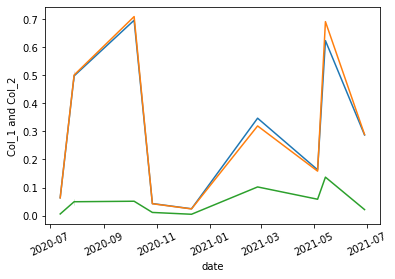

In [76]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.lineplot(x = "date", y = "ndvi_mean", data = df3)
sns.lineplot(x = "date", y = "ndvi_median", data = df3)
sns.lineplot(x = "date", y = "ndvi_std", data = df3)
plt.ylabel("Col_1 and Col_2")
plt.xticks(rotation = 25)

# sns.lineplot(data = df2['ndvi_median'], condition = df2['target'],\
#            time  = df2['date'], color = 'blue',linewidth = 5)

In [ ]:
# # field, date, mean_11, std_1, mean2,std_2 etc.
# def caculate(array):
#     for band in array:
#         print(band)
#         b_min = band.min()
#         b_mean = band.mean()
#         b_median= np.median(band)
#         b_max = band.max()
#         print(b_max)

In [ ]:
def caculate(array):
    for band in array:
        b_mean = band.mean()

In [ ]:
# df.X.shape

In [ ]:
# df['mean'] = df['X'].apply(caculate)
# df

In [ ]:
# df.X[0].shape

In [ ]:
# mean_1 = np.mean(df.X[0][0])
# mean_1
# mean_2 = np.mean(df.X[0][1])
# mean_2

In [ ]:
# show(df.X[0][:,:,12])